# Setup


## Colab

In [1]:
# # # Mount the drive and move to dir
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # Switch to current dir
# %cd /content/drive/MyDrive/Coding/spread-res/runscr/

## Import

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAvg

## Config Setup

In [2]:
# Define the input configuration for the simple model
input_config = {

    # Environment and Model Info
    "env": "local",
    "approach": "simple",
    "model_name": "SimpleGeluEmbedAvg",
    
    # System Configuration
    "device": "mps",
    "threads": 8,
    "seed": 0,
    
    # Data Configuration
    "data_dir": "../data/",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch_size": 40,
    "lr": 1e-1,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 0,
    "save_dir": "../models/",
}

# Setup the configuration using setuputil and display it
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Getting Vocab: 100%|██████████| 40/40 [00:02<00:00, 15.28it/s]


41(P) = 40(G) + 1(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|██████████| 5597/5597 [00:00<00:00, 133963.64it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|██████████| 40/40 [00:00<00:00, 56.58it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 11970.05it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 13197.94it/s]



5(P) = 5(G) + 0(E)
{
  "env": "local",
  "approach": "simple",
  "DEVICE": "<device>",
  "THREADS": 8,
  "seed": 0,
  "model_base": "glove50",
  "model_name": "SimpleGeluEmbedAvg",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data/",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "vocab": "<Vocab>",
  "wvs": "<Tensor>",
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "train_loader": "<LoaderSimple>",
  "val_loader": "<LoaderSimple>",
  "test_loader": "<LoaderSimple>",
  "batch_size": 40,
  "lr": 0.1,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 0,
  "save_dir": "../models/",
  "save_name": "sim0l_g50SimpleGeluEmbedAvg_manual10010032_ba40lr1e-1ep20pa2_bSp5k"
}


# Model Training

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAvg(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAvg(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader,
    val_data=val_loader,
    DEVICE=DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Train Loss: 1.7716628313064575, Perplexity: 1.0000177167852535
Val Loss: 0.6550508737564087, Perplexity: 1.0000065505301923


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Train Loss: 0.6676965355873108, Perplexity: 1.0000066769876468
Val Loss: 0.4066670835018158, Perplexity: 1.000004066679104


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Train Loss: 0.4087720215320587, Perplexity: 1.00000408772857
Val Loss: 0.337909996509552, Perplexity: 1.0000033791056742


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Train Loss: 0.339858740568161, Perplexity: 1.0000033985931809
Val Loss: 0.3500746190547943, Perplexity: 1.0000035007523183


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Train Loss: 0.34582868218421936, Perplexity: 1.0000034582928017
Val Loss: 0.3131038248538971, Perplexity: 1.0000031310431503


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Train Loss: 0.31340664625167847, Perplexity: 1.0000031340713738
Val Loss: 0.3154466152191162, Perplexity: 1.0000031544711274


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Train Loss: 0.3119984269142151, Perplexity: 1.0000031199891364
Val Loss: 0.2871251702308655, Perplexity: 1.0000028712558244


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Train Loss: 0.28844889998435974, Perplexity: 1.0000028844931599
Val Loss: 0.28073886036872864, Perplexity: 1.0000028073925444


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Train Loss: 0.27992233633995056, Perplexity: 1.0000027992272813
Val Loss: 0.26726505160331726, Perplexity: 1.0000026726540876


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Train Loss: 0.2690427303314209, Perplexity: 1.0000026904309225
Val Loss: 0.26032453775405884, Perplexity: 1.0000026032487659


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Train Loss: 0.26058652997016907, Perplexity: 1.000002605868695
Val Loss: 0.2504311800003052, Perplexity: 1.0000025043149359


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Train Loss: 0.25321829319000244, Perplexity: 1.0000025321861379
Val Loss: 0.24341945350170135, Perplexity: 1.0000024341974976


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Train Loss: 0.2458600401878357, Perplexity: 1.0000024586034242
Val Loss: 0.2344459593296051, Perplexity: 1.0000023444623416


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Train Loss: 0.23886005580425262, Perplexity: 1.0000023886034108
Val Loss: 0.22768206894397736, Perplexity: 1.0000022768232815


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Train Loss: 0.2319740653038025, Perplexity: 1.0000023197433436
Val Loss: 0.21906115114688873, Perplexity: 1.000002190613911


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Train Loss: 0.22489753365516663, Perplexity: 1.0000022489778655
Val Loss: 0.21259546279907227, Perplexity: 1.0000021259568879


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Train Loss: 0.21753659844398499, Perplexity: 1.0000021753683506
Val Loss: 0.20439480245113373, Perplexity: 1.0000020439501134


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Train Loss: 0.21153667569160461, Perplexity: 1.0000021153689944
Val Loss: 0.19872033596038818, Perplexity: 1.000001987205334


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Train Loss: 0.20519788563251495, Perplexity: 1.0000020519809616
Val Loss: 0.19082523882389069, Perplexity: 1.0000019082542089


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

Train Loss: 0.19980841875076294, Perplexity: 1.0000019980861836
Val Loss: 0.18666793406009674, Perplexity: 1.0000018666810828



TRAINING DONE at epoch 19, best epoch 19
Train Loss = 0.19980841875076294, Perplexity = 1.0000019980861836
Val Loss = 0.18666793406009674, Perplexity = 1.0000018666810828


# Evaluation

In [11]:
# Define params for evaluation
thresh = 0.93
loc = 0
cond = ">"
disp_max = True

## Single Example


Filename: ../data/manual_train/idrportfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(6,0): 0.92244279384613037109
(19,0): 0.92347037792205810547
(9,1): 0.92402273416519165039
(15,0): 0.92535442113876342773
(11,0): 0.92673206329345703125
(6,1): 0.92738068103790283203
(7,0): 0.92798054218292236328
(8,1): 0.92873173952102661133
(7,1): 0.93138247728347778320
(4,14): 0.93143498897552490234
(4,18): 0.94143337011337280273
(4,8): 0.95817834138870239258
(4,6): 0.95994520187377929688
(4,16): 0.96041691303253173828
(4,12): 0.96055078506469726562
(4,10): 0.96073138713836669922
(5,0): 0.96432572603225708008
(4,4): 0.96601259708404541016
(4,2): 0.97264802455902099609
(5,3): 0.98332870006561279297
(0,0): 0.98715680837631225586
(5,2): 0.99441647529602050781
(5,4): 0.99493813514709472656

NB to B ratio: Predicted = 9938:62 | Actual = 9912:88
Accuracy: 99.74% | Precision: 100.00% | Recall: 70.45% | F1-Score: 0.83



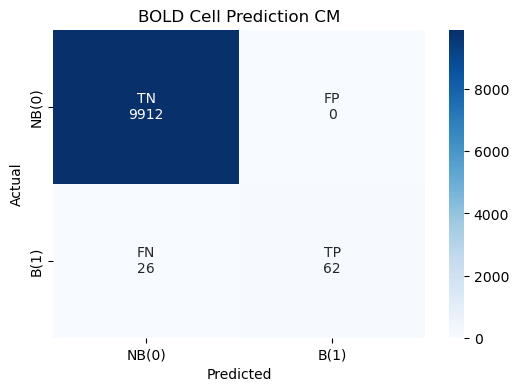


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_val/portfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(6,0): 0.92244279384613037109
(21,0): 0.92347037792205810547
(7,1): 0.92402273416519165039
(17,0): 0.92535442113876342773
(13,0): 0.92673206329345703125
(8,1): 0.92738068103790283203
(9,0): 0.92798054218292236328
(6,1): 0.92873173952102661133
(9,1): 0.93138247728347778320
(4,14): 0.93143498897552490234
(4,18): 0.94143337011337280273
(4,8): 0.95817834138870239258
(4,6): 0.95994520187377929688
(4,16): 0.96041691303253173828
(4,12): 0.96055078506469726562
(4,10): 0.96073138713836669922
(5,0): 0.96432572603225708008
(4,4): 0.96601259708404541016
(4,2): 0.97264802455902099609
(5,3): 0.98332870006561279297
(0,0): 0.99295735359191894531
(5,2): 0.99441647529602050781
(5,4): 0.99493813514709472656

NB to B ratio: Predicted = 9938:62 | Actual = 9908:92
Accuracy: 99.70% | Precision: 100.00% | Recall: 67.39% | F1-Score: 0.81



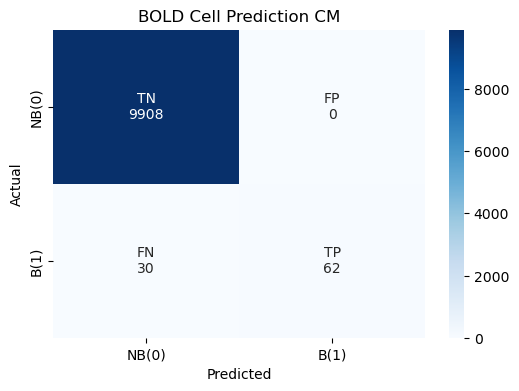


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_test/harassment-bullying-on-basis-of-disability-reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,22): 0.92041629552841186523
(3,1): 0.92142093181610107422
(4,11): 0.92223304510116577148
(5,3): 0.92946445941925048828
(1,1): 0.92951446771621704102
(5,4): 0.93226242065429687500
(5,18): 0.93261748552322387695
(4,5): 0.93483716249465942383
(3,2): 0.95107263326644897461
(3,3): 0.95728671550750732422
(3,23): 0.96340489387512207031
(3,21): 0.96963733434677124023
(4,15): 0.97176378965377807617
(4,9): 0.97570943832397460938
(3,24): 0.97671222686767578125
(4,3): 0.98364603519439697266
(4,7): 0.98456466197967529297
(4,13): 0.98747557401657104492
(3,17): 0.98754495382308959961
(3,19): 0.99272716045379638672

NB to B ratio: Predicted = 9947:53 | Actual = 9931:69
Accuracy: 99.84% | Precision: 100.00% | Recall: 76.81% | F1-Score: 0.87



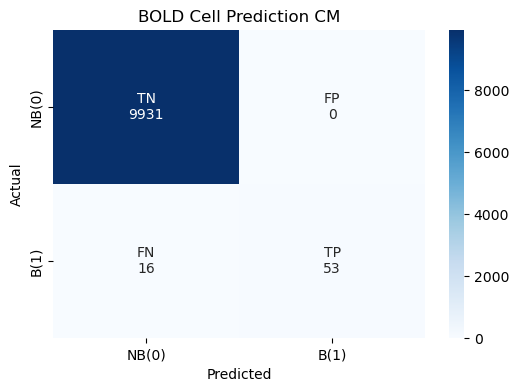


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [12]:
# Check with single example
infer_one(
    trained_model,
    train_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE,
)
infer_one(
    trained_model,
    val_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE,
)
infer_one(
    trained_model,
    test_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE,
)

## All Examples

Batch Inference: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 397839:2161 | Actual = 396714:3286
Accuracy: 99.71% | Precision: 99.12% | Recall: 65.19% | F1-Score: 0.79



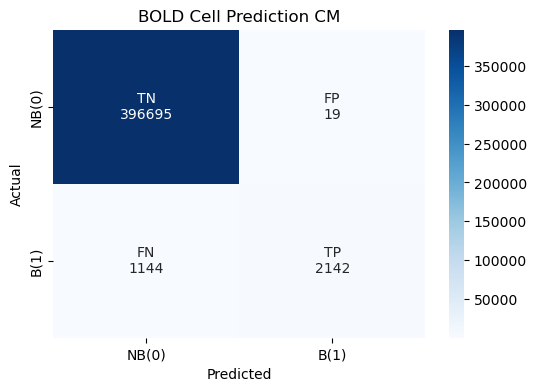

In [13]:
# Evaluate the model on all train files
infer_full(
    trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49726:274 | Actual = 49602:398
Accuracy: 99.74% | Precision: 99.27% | Recall: 68.34% | F1-Score: 0.81



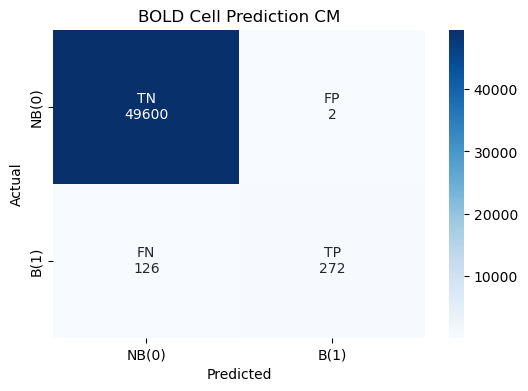

In [14]:
# All val files
infer_full(
    trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49756:244 | Actual = 49606:394
Accuracy: 99.70% | Precision: 99.59% | Recall: 61.68% | F1-Score: 0.76



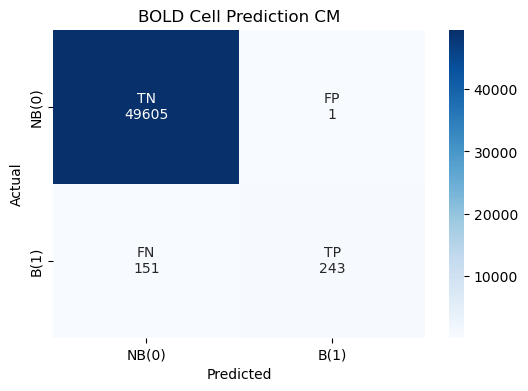

In [15]:
# All test files
infer_full(
    trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE
)